In [1]:
stock_ = 'ONGC'

In [20]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol=stock_,start=start,end=end)

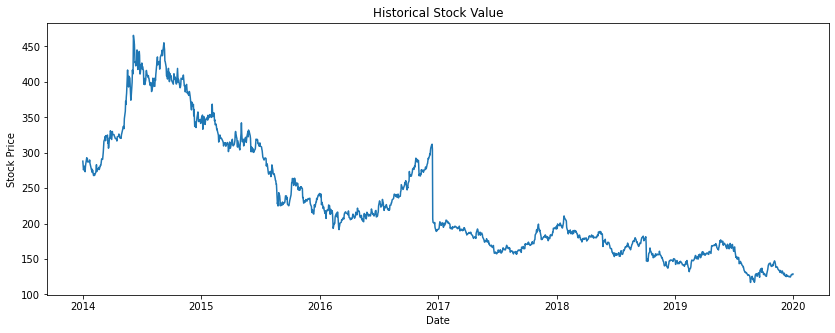

In [4]:
plt.figure(figsize=(14,5))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [5]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [6]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1478):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [8]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_split=0.2)

Epoch 1/15
36/36 [==============================] - 5s 146ms/step - loss: 0.0250 - val_loss: 6.9309e-04
Epoch 2/15
36/36 [==============================] - 4s 118ms/step - loss: 0.0059 - val_loss: 8.5035e-04
Epoch 3/15
36/36 [==============================] - 4s 115ms/step - loss: 0.0048 - val_loss: 8.2239e-04
Epoch 4/15
36/36 [==============================] - 4s 113ms/step - loss: 0.0046 - val_loss: 9.4918e-04
Epoch 5/15
36/36 [==============================] - 4s 104ms/step - loss: 0.0044 - val_loss: 8.3803e-04
Epoch 6/15
36/36 [==============================] - 4s 107ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 7/15
36/36 [==============================] - 4s 117ms/step - loss: 0.0038 - val_loss: 4.5149e-04
Epoch 8/15
36/36 [==============================] - 4s 114ms/step - loss: 0.0043 - val_loss: 4.3803e-04
Epoch 9/15
36/36 [==============================] - 4s 116ms/step - loss: 0.0036 - val_loss: 4.5092e-04
Epoch 10/15
36/36 [==============================] - 4s 114ms/step -

<br>
<h2> Loading Saved Model </h2>

In [21]:
regressor = keras.models.load_model('saved_models/{}_pre'.format(stock_))

<br>
<h2> Testing Validity On the 5 year Data first </h2>

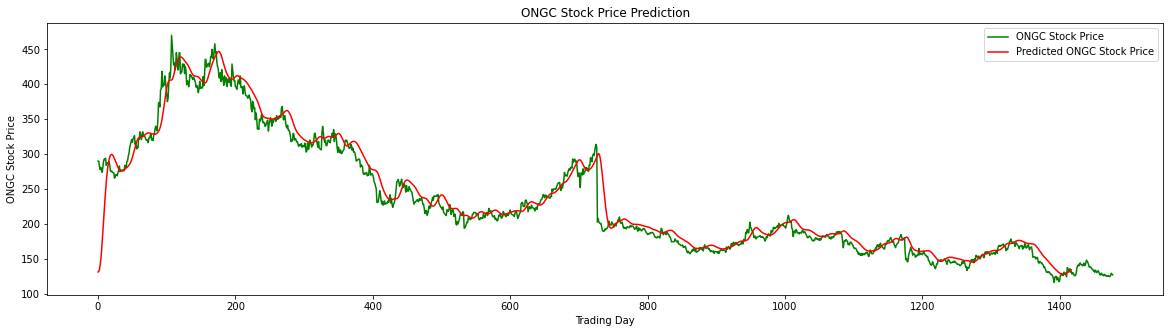

In [24]:
testdataframe= gh(symbol=stock_,start=dt.datetime(2014,1,1),end=dt.datetime(2019,12,31))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
#upper limit is number of days - 25
for i in range(60, 1478):          
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.figure(figsize=(20,5))
plt.plot(real_stock_price, color = 'green', label = '{} Stock Price'.format(stock_))
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted {} Stock Price'.format(stock_))
plt.title('{} Stock Price Prediction'.format(stock_))
plt.xlabel('Trading Day')
plt.ylabel('{} Stock Price'.format(stock_))
plt.legend()
plt.show()

<br>
<h2> Difference between Normal and Corona </h2>

In [25]:
testdataframe= gh(symbol=stock_,start=dt.datetime(2020,1,1),end=dt.datetime(2020,8,31))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
#upper limit is number of days - 25
for i in range(60, 218):          
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

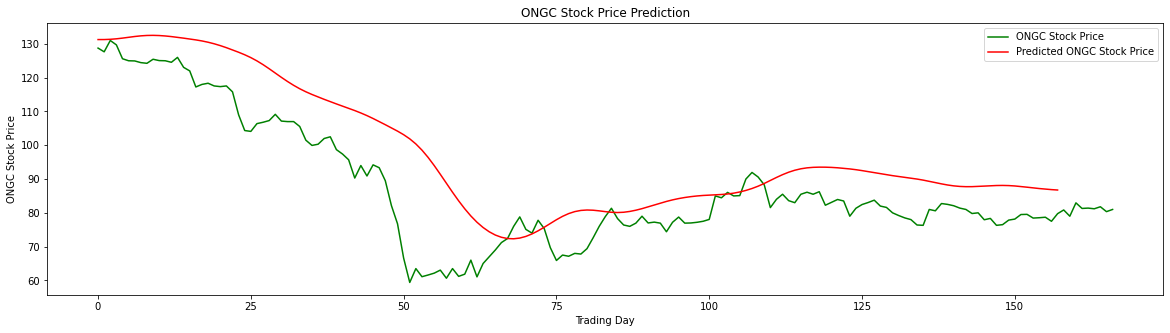

In [27]:
plt.figure(figsize=(20,5))
plt.plot(real_stock_price, color = 'green', label = '{} Stock Price'.format(stock_))
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted {} Stock Price'.format(stock_))
plt.title('{} Stock Price Prediction'.format(stock_))
plt.xlabel('Trading Day')
plt.ylabel('{} Stock Price'.format(stock_))
plt.legend()
plt.show()

<br>
<h2> Saving The Model </h2>

In [28]:
regressor.save('saved_models/{}_pre'.format(stock_))

INFO:tensorflow:Assets written to: saved_models/ONGC_pre\assets
